<center><img src="redpopcorn.jpg"></center>

# Netflix exploratory analysis and visualisation using Python

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [42]:
# Importing pandas, matplotlib, numpy and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
print("Done!")

Done!


## Basic analysis of data
### Sneak a peek
Let us first see what we are working with. We can do this using `netflix_df.head()` from pandas. This allows us to observe the first 5 rows in the data to give us a quick peek at what we have.

In [43]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


This is good but we arrive at a couple of problems. Title looks like it is recording time as opposed to a traditional title and the duration seems a little confusing. Why is show_id s6 lasting for "1"? Maybe viewing some random rows in the data can alleviate these confusions. We can do this using `netlfix_df.sample(n=5)`.

In [44]:
netflix_df.sample(n=5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4559,s7348,Movie,Ungli,Renzil D'Silva,"Emraan Hashmi, Randeep Hooda, Kangana Ranaut, ...",India,"April 1, 2020",2014,114,An undercover cop finds himself in a strange p...,Comedies
3530,s5651,Movie,Skins,Eduardo Casanova,"Ana Polvorosa, Candela Peña, Macarena Gómez, C...",Spain,"April 1, 2017",2017,78,"Deformed, disfigured characters must find a wa...",Dramas
1244,s1966,Movie,El silencio es bienvenido,Gabriela García Rivas,"Eileen Yáñez, Jorge Luis Moreno, Daniela Newto...",Mexico,"March 20, 2020",2017,95,As a teen languishes during a spiritless road ...,Dramas
1414,s2258,Movie,Franco Escamilla: Bienvenido al mundo,Ulises Valencia,Franco Escamilla,Mexico,"April 17, 2019",2019,54,Comedian Franco Escamilla shares stories about...,Stand-Up
3235,s5208,Movie,Righteous Kill,Jon Avnet,"Robert De Niro, Al Pacino, 50 Cent, Carla Gugi...",United States,"June 1, 2019",2008,101,Two detectives investigate a rash of vigilante...,Dramas


Now things are starting to make some more sense. The duration seems to record the how long the show lasts in minutes and the title does seem to be what we usualy mean by title, as we expected. This was proabably obvious to begin with but this shows the power of `netlfix_df.sample()`.

### Quick first impressions of data
A quick way to get some first impressions of the data is by using `netflix_df.column.describe()` let us use this on genre and duration.

In [45]:
netflix_df.genre.describe()

count       4812
unique        31
top       Dramas
freq        1343
Name: genre, dtype: object

From this we can see:
- There are 4812 shows.
- The most created type of shows is dramas.
- About 30% of shows are dramas.
- There are 31 unique types of shows produced.

In [46]:
netflix_df.duration.describe().round(2)

count    4812.00
mean       99.57
std        30.89
min         1.00
25%        88.00
50%        99.00
75%       116.00
max       253.00
Name: duration, dtype: float64

From this we can see:
- The mean is about 100 minutes. But the mean is not representative of the data due to the high standard deviation. 
- 75% of shows are under 2 hours long, as expected.
- The longest show lasts for about 4 hours!

## Exploratory data analysis
### Which country produces the most shows?
This will give us a good insight into which country has the most shows in Netflix.

In [47]:
df_country = netflix_df.groupby('country').show_id.count().sort_values(ascending = False)
df_country

country
United States     1886
India              864
United Kingdom     311
Canada             155
France             133
                  ... 
Paraguay             1
Guatemala            1
Namibia              1
Iran                 1
Zimbabwe             1
Name: show_id, Length: 72, dtype: int64

Seems like hollywood and bollywood are dominating Netlix shows with UK, Canada, France and Spain trailing behind.

### What is the most frequent type?
Is Netflix dominated by one type of movie? If so, why is this the case?

In [48]:
df_type = netflix_df.groupby(['type']).show_id.count().to_frame(name='count')
df_type['percent'] = (100 * df_type.iloc[:] / df_type.sum()).round()
df_type

,count,percent
type,,
Movie,4677,97.0
TV Show,135,3.0


This tells us that Netflix is dominated by movies. This does make sense as:
- Most people do not have the time to watch an entire TV show.
- It would be a lot more time consuming to create a TV show than a movie. 
- Some shows may be more expensive to produce than movies (especially the show with movie like production in every episode).

Let us create a grouped bar chart visualisation to accuratley represent both of our findings.

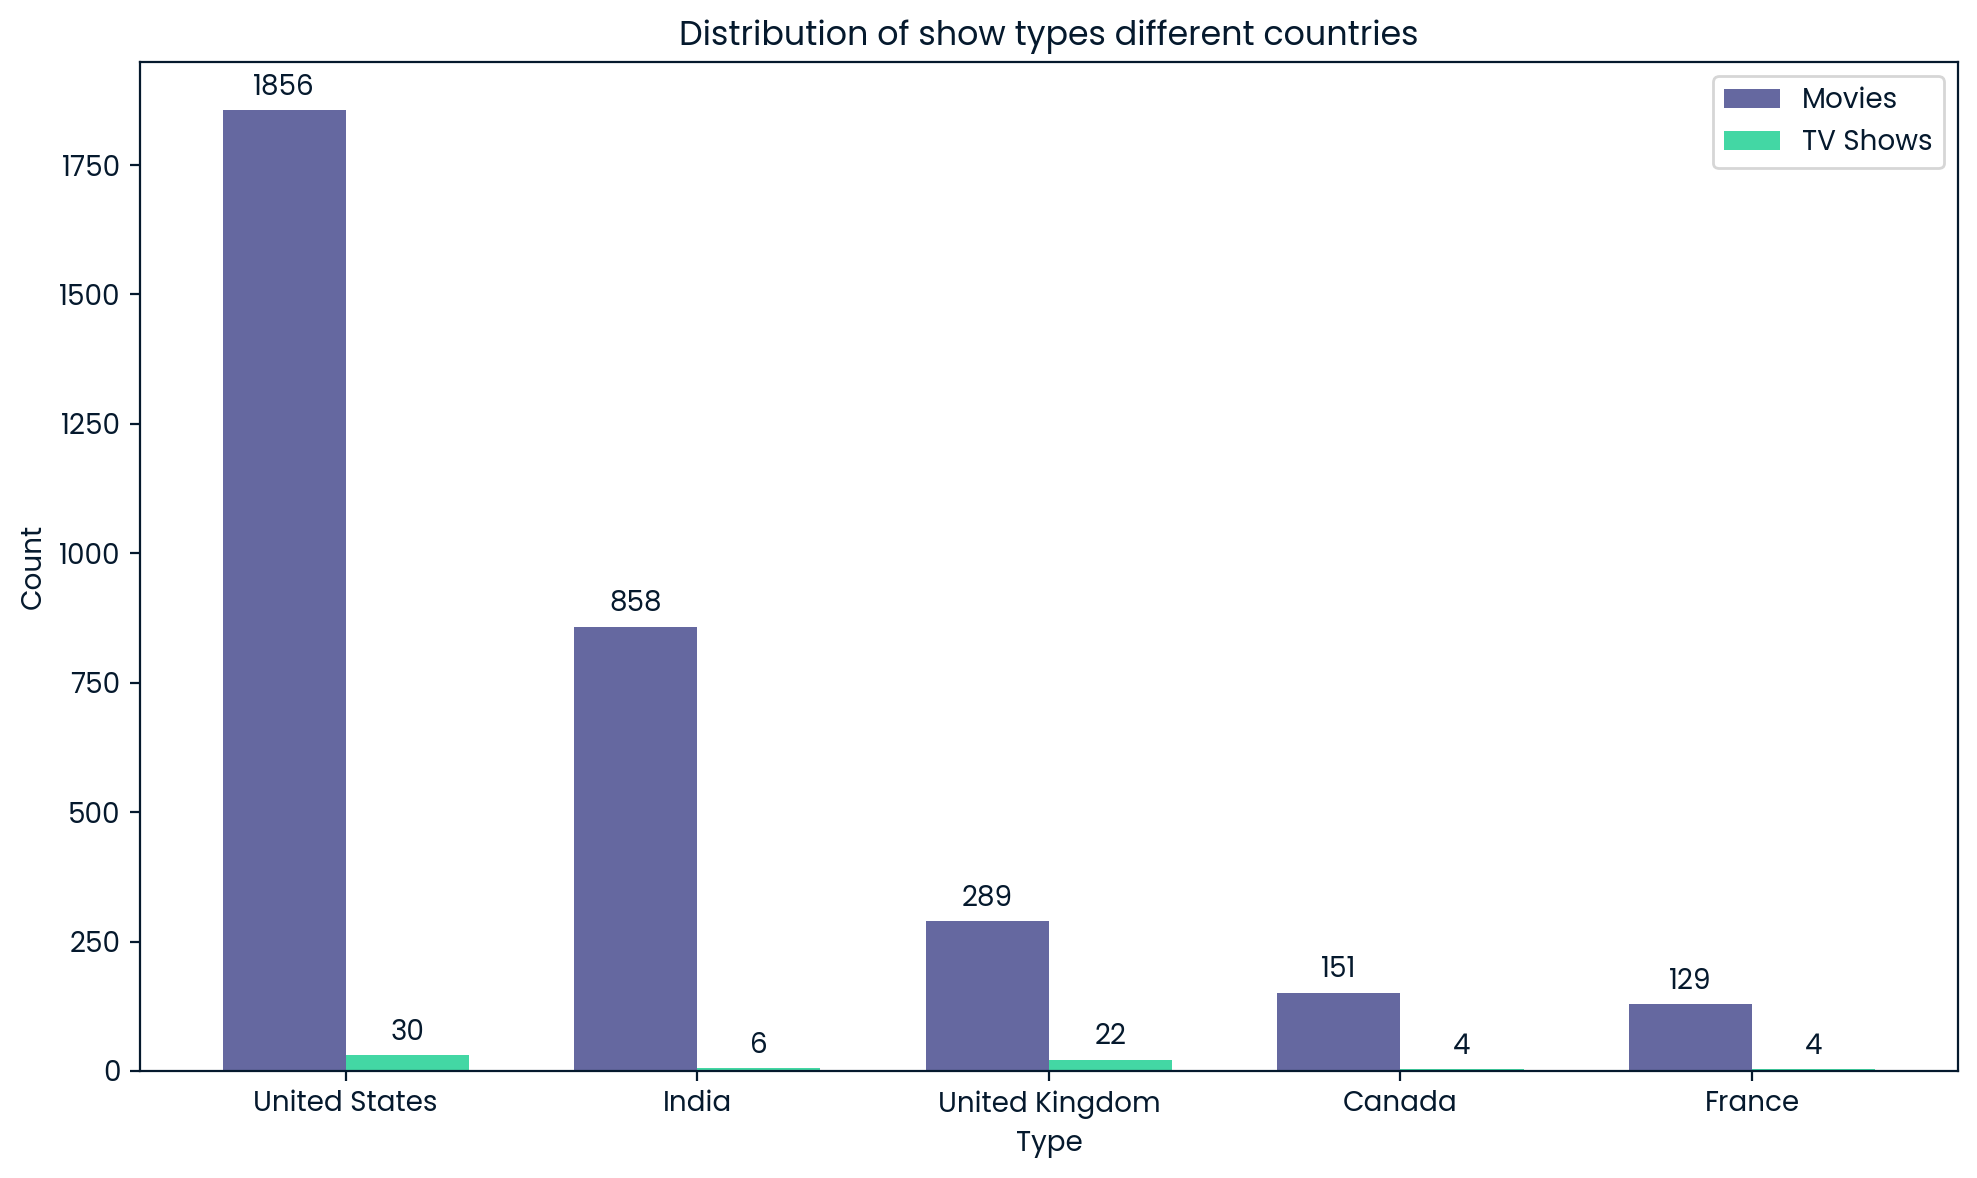

In [49]:
# Get a list with the top 5 countries.
countries = np.array([country for country in df_country.head().reset_index().country])

# Number of countries.
l = np.arange(len(countries))

# Collect data on the type of show generated in the top 5 countries.
df_country_type = netflix_df.groupby(['country', 'type']).show_id.count().sort_values(ascending = False)

top_five_df_country_type = df_country_type.loc[countries].reset_index().rename(columns = {"show_id": "count"})

# Create numpy arrays on frequencies of each type.
df_movies = top_five_df_country_type.loc[top_five_df_country_type.type == 'Movie']
movies = np.array([count for count in df_movies['count']])

df_tv_shows = top_five_df_country_type.loc[top_five_df_country_type.type == 'TV Show']
tv_shows = np.array([count for count in df_tv_shows['count']])

# Width of the bars.
width = 0.35  

# Create the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting movies and TV shows side by side
rects1 = ax.bar(l - width/2, movies, width, label = 'Movies')
rects2 = ax.bar(l + width/2, tv_shows, width, label = 'TV Shows')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of show types different countries')
ax.set_xticks(l)
ax.set_xticklabels(countries)
ax.legend()

# Function to add values on top of the bars.
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

# Show the plot.
plt.tight_layout()
plt.show()

Now some may argue that this is not the best visualisation and two seperate bar charts presenting TV shows and movies would be much better. Although this would better visualise the TV shows, the severity in which movies dominates the TV shows will be lost. Plus the numbers are still nice and easy to read so I think the grouped visualisation works perfectly!

### Genre breakdown per year
How common were each genres over the years. Did some rise and others fall?

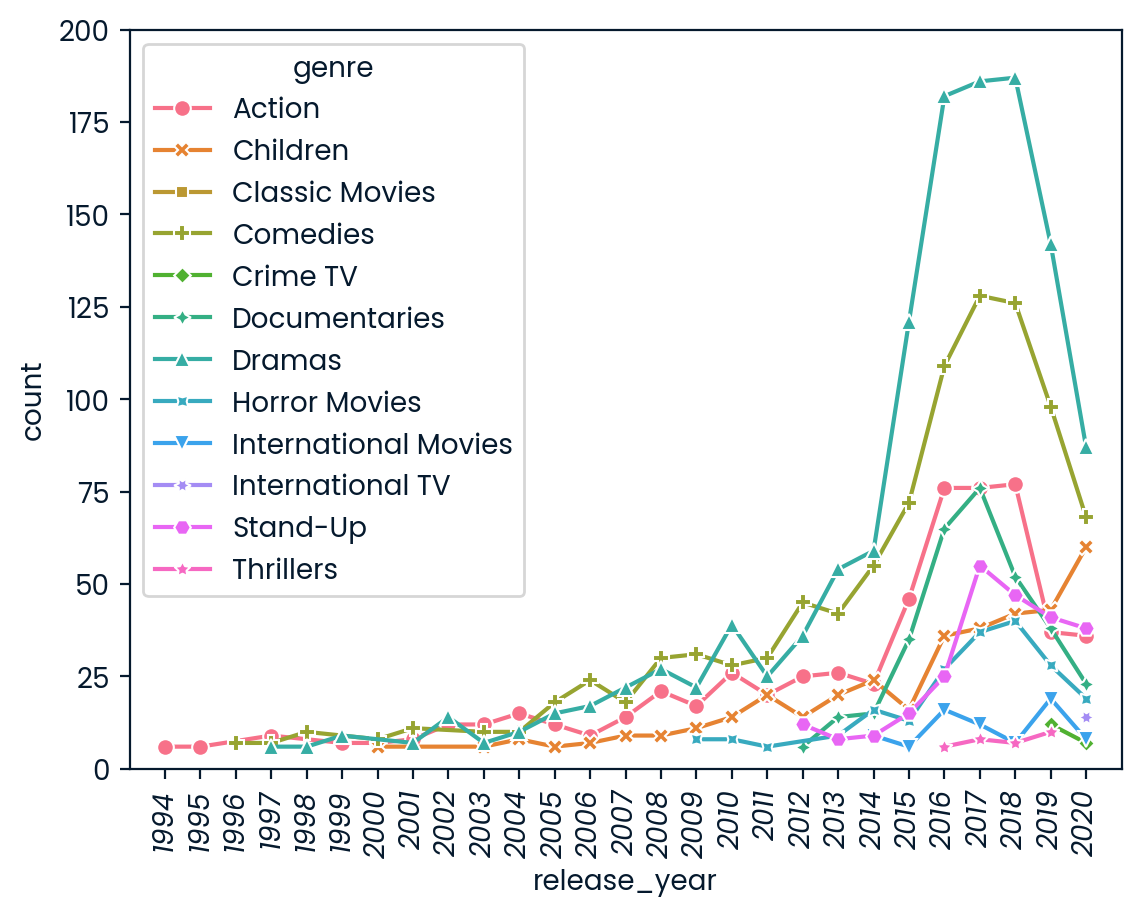

In [50]:
genre_time_evo = netflix_df.groupby(['release_year', 'genre'])['show_id'].count().reset_index(name='cnt')

genre_time_evo_sort = genre_time_evo.sort_values(by = ['genre', 'release_year'], ascending=True).loc[genre_time_evo.cnt > 5]

table = genre_time_evo_sort.pivot(index = "release_year", columns = "genre", values = "cnt")

# Reshaping the pivoted table to long format using melt.
table_melted = table.reset_index().melt(id_vars='release_year', var_name='genre', value_name='cnt')

# Plotting the line plot with hue based on genre.
sns.lineplot(data=table_melted, x="release_year", y="cnt", hue="genre", style="genre", markers=True, dashes=False)

# Set x and y limits.
plt.xlim(1993, 2021)  
plt.ylim(0, 200)

# Set appropriate titles
plt.xlabel("release_year")
plt.ylabel("count")

# Change the x increments form 5 to 1.
plt.xticks(np.arange(1994, 2021, 1), rotation = 90, fontstyle = 'italic')

# Show the plot
plt.show()

From this we can conclude:
- Most genres have a hug spike at 2014
- The most amount of shows released was in 2017, this suggests Netflix had a huge spike in popularity at 2016-2017
- Comedies and dramas are the most popular show genres till dramas take the lead at 2015.
- Most likley due to COVID, the only genre to have an increase in shows produced is children. This makes sense as a lot of parents wil be at home with their children, potentially working remotley, so need a way to ddistract their kids whilst they work.

### Most frequent movie duration in the 1990s
We will save an approximate answer as an integer called `duration`.

In [51]:
# Get all movies in the 1990s.
netflix_df_1990s = netflix_df.loc[((1990 <= netflix_df.release_year) & (netflix_df.release_year < 2000)) & (netflix_df.type == 'Movie')]

# Use the .describe() function to retrieve the most frequent duration (note: the duration must be in a string to figure out the most common number).
nineties_summary = netflix_df_1990s.duration.astype('str').describe()

# Get the most frequent duration.
duration = int(nineties_summary.top)

print(duration)

94


### Number of short action movies
A movie is considered short if it is less than 90 minutes. We will now count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.

In [52]:
short_action_movies_1990s = netflix_df_1990s.loc[(netflix_df_1990s.duration < 90) & (netflix_df_1990s.genre == 'Action')]

short_movie_count = int(short_action_movies_1990s.count().show_id)
print(short_movie_count)

7
